# Machine Learning and Neural Computing: Data Classification Coursework

In [1]:
#####################
# Loading Libraries #
#####################

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## Task 1 (a)

In [2]:
# Loading train data
train = pd.read_csv('trndata.csv')
print('Training set shape:', train.shape)
train.head()

Training set shape: (1000, 13)


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,L
0,0.3315,0.2156,0.6802,0.1434,0.6825,0.2720,0.6223,0.2092,0.7961,0.1530,0.5856,0.2573,1
1,0.0939,1.0089,0.0365,0.6944,0.0908,0.4961,0.0722,0.6521,-0.0130,0.6085,0.0631,0.6597,2
2,0.5184,0.2283,0.5300,0.6884,0.7456,0.6171,0.6136,0.5928,0.7678,0.6130,0.6705,0.5202,1
3,0.4208,0.6740,0.1651,0.7592,0.1810,0.5448,0.1707,0.7554,0.1635,0.5492,0.2598,0.6455,2
4,0.3130,0.6465,0.5908,0.6924,0.7664,0.6262,1.7177,0.0150,0.0851,1.9046,-0.0165,0.0221,3


In [3]:
# Loading test data
test = pd.read_csv('tstdata.csv')
print('Test set shape:', test.shape)
test.head()

Test set shape: (300, 13)


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,L
0,0.5803,0.4980,0.8809,0.8215,1.0133,0.9187,0.8508,0.8496,0.9996,0.9670,0.9111,0.7814,1
1,0.0026,0.6084,0.2808,0.6282,0.2995,0.7513,-0.0107,1.7503,-0.0622,2.0704,-0.0999,0.1214,3
2,-0.0115,1.1193,0.2201,1.3189,0.2656,1.4039,-0.0067,1.7438,0.0013,2.0020,-0.0401,1.7797,3
3,-0.0536,1.0370,0.0558,1.2483,0.2640,1.1456,0.0140,1.7156,0.0125,1.9889,-0.0598,0.0709,3
4,0.5021,0.4270,0.6450,0.8325,0.7560,0.9235,0.7289,0.7352,0.7735,0.9298,0.6013,0.8842,1


## Task 1 (b)

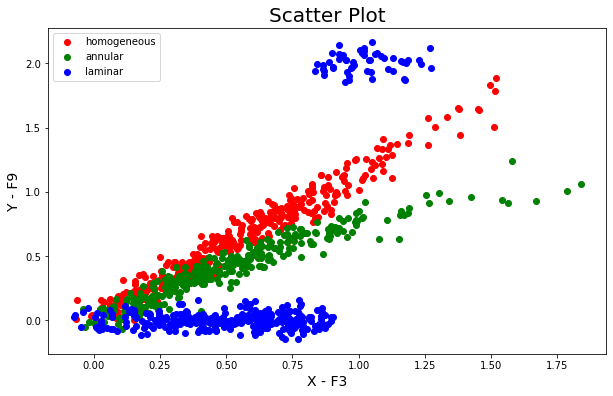

In [4]:
# Scatter Plot with two features and three classes
# setting up labels and colours for whole project
label_dict = {1: 'homogeneous', 2: 'annular', 3: 'laminar'}
labels = [1, 2, 3]
colours = ['red', 'green', 'blue']

# plot style
fig = plt.figure(figsize = (10, 6))

# plot data
for label, colour in zip(labels, colours):
    idx = train.L == label
    plt.scatter(train.loc[idx, 'F3'], train.loc[idx, 'F9'], color=colour, label=label_dict[labels[label-1]])

# plot format
plt.title('Scatter Plot', fontsize=20)
plt.xlabel('X - F3', fontsize=14)
plt.ylabel('Y - F9', fontsize=14)
plt.legend(loc='best')
plt.show()

## Task 1 (c)

In [5]:
# Normalise training and test sets
# getting data from training set
train_inputs = train.iloc[:, :12]
train_labels = train.iloc[:,12]

# getting data from test set
test_inputs = test.iloc[:, :12]
test_labels = test.iloc[:,12]

# fit training set
scaler_original = StandardScaler().fit(train_inputs)

# transform train and test sets
scaled_train_inputs = scaler_original.transform(train_inputs)
scaled_test_inputs = scaler_original.transform(test_inputs)

## Task 1 (d)

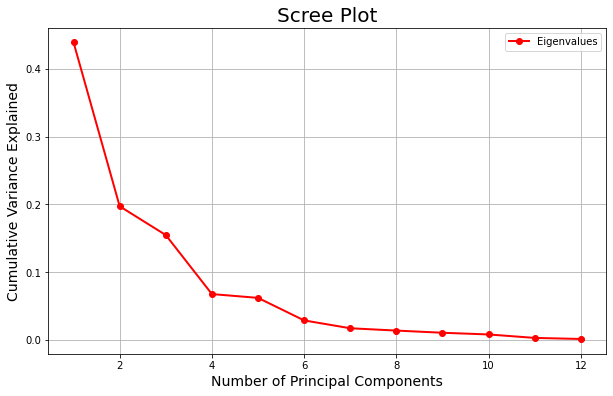

Variance ratio captured by each PC: [0.44 0.64 0.79 0.86 0.92 0.95 0.97 0.98 0.99 1.   1.   1.  ]

Variance captured by each PC: [5.27 2.37 1.86 0.81 0.74 0.34 0.2  0.16 0.12 0.09 0.03 0.01]

Projection training set shape: (1000, 12)

Projection training set:
 [[ 1.7525665   0.24970251 -1.23222812 ... -0.0213878   0.12900918
   0.07866654]
 [-2.80600794  0.67677533 -1.32311273 ...  0.04528735 -0.08790963
  -0.00628388]
 [ 0.58384047 -0.82271245 -0.08518155 ... -0.49416162 -0.16008337
  -0.06464515]
 ...
 [ 1.73913261 -1.20691542  1.72647523 ...  0.39477021 -0.02800862
  -0.06408446]
 [-0.72489913 -1.88007675 -0.3545893  ...  0.01453811 -0.01324312
   0.01968521]
 [-2.67630836  1.05240255 -0.64298981 ...  0.15501292  0.0933526
   0.0836483 ]]


In [6]:
# PCA analysis
pca = PCA()
pca1 = pca.fit(scaled_train_inputs)
proj_train_input = pca1.transform(scaled_train_inputs)
index = np.arange(pca1.n_components_) + 1

# scree plot
# plot style
fig = plt.figure(figsize = (10, 6))

# plot data
plt.plot(index, pca1.explained_variance_ratio_, 'ro-', linewidth=2)

# plot format
plt.title('Scree Plot', fontsize=20)
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Cumulative Variance Explained', fontsize=14)
plt.legend(['Eigenvalues'], loc='best')
plt.grid()
plt.show()

print('Variance ratio captured by each PC:', np.cumsum(np.round(pca1.explained_variance_ratio_, 2)))
print('\nVariance captured by each PC:', np.round(pca1.explained_variance_, 2))
print('\nProjection training set shape:', proj_train_input.shape)
print('\nProjection training set:\n', proj_train_input)

## Task 1 (e)

Variation per Principal Component: [0.439 0.197 0.155]


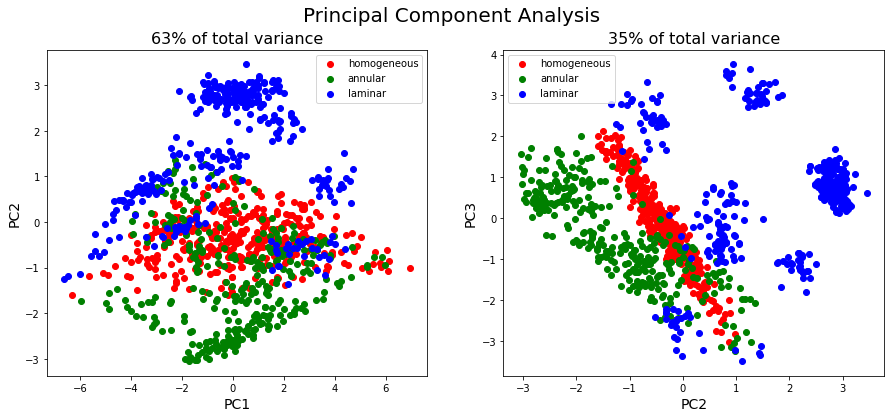

In [7]:
# Two subplots:
pca_3 = PCA(n_components=3)
pca_input = pca_3.fit_transform(scaled_train_inputs)
print('Variation per Principal Component: {}'.format(np.round(pca_3.explained_variance_ratio_, 3)))

# create a DataFrame to hold principal components values
pca_df = pd.DataFrame(data = pca_input, columns = ['PC1', 'PC2', 'PC3'])

# 2 plots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Principal Component Analysis', fontsize=20)

# PC1 and PC2 plot
for label, colour in zip(labels, colours):
    idx = train.L == label
    ax[0].scatter(pca_df.loc[idx, 'PC1'], pca_df.loc[idx, 'PC2'], color=colour, label=label_dict[labels[label-1]])
ax[0].set_title('63% of total variance', fontsize=16)
ax[0].set_xlabel('PC1', fontsize=14)
ax[0].set_ylabel('PC2', fontsize=14)
ax[0].legend(loc='best')

# PC2 and PC3 plot
for label, colour in zip(labels, colours):
    idx = train.L == label
    ax[1].scatter(pca_df.loc[idx, 'PC2'], pca_df.loc[idx, 'PC3'], color=colour, label=label_dict[labels[label-1]])
ax[1].set_title('35% of total variance', fontsize=16)
ax[1].set_xlabel('PC2', fontsize=14)
ax[1].set_ylabel('PC3', fontsize=14)
ax[1].legend(loc='best')

plt.show()

## Task 1 (f)

In [8]:
# Projection of the scaled test
proj_test_input = pca1.transform(scaled_test_inputs)
print('Projection test set shape:', proj_test_input.shape)
print('\nProjection test set:\n', proj_train_input)

Projection test set shape: (300, 12)

Projection test set:
 [[ 1.7525665   0.24970251 -1.23222812 ... -0.0213878   0.12900918
   0.07866654]
 [-2.80600794  0.67677533 -1.32311273 ...  0.04528735 -0.08790963
  -0.00628388]
 [ 0.58384047 -0.82271245 -0.08518155 ... -0.49416162 -0.16008337
  -0.06464515]
 ...
 [ 1.73913261 -1.20691542  1.72647523 ...  0.39477021 -0.02800862
  -0.06408446]
 [-0.72489913 -1.88007675 -0.3545893  ...  0.01453811 -0.01324312
   0.01968521]
 [-2.67630836  1.05240255 -0.64298981 ...  0.15501292  0.0933526
   0.0836483 ]]


## Task 2 (a)

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(train_inputs, train_labels, test_size=0.3, random_state=10)
print('Training inputs:', X_train.shape)
print('Validation inputs:', X_valid.shape)
print('Training labels:', y_train.shape)
print('Validation labels:', y_valid.shape)

Training inputs: (700, 12)
Validation inputs: (300, 12)
Training labels: (700,)
Validation labels: (300,)


## Task 2 (b)

In [10]:
# Normalise training and validation sets
# fit training set
scaler_split = StandardScaler().fit(X_train)

# transform training and validation sets
scaled_X_train = scaler_split.transform(X_train)
scaled_X_valid = scaler_split.transform(X_valid)

## Task 3 (a)i

In [11]:
# Choosing the most suitable parameters
# setting up target names for whole project 
target_names = ['homogeneous', 'annular', 'laminar']

In [12]:
# Model 1: C=50, y=10
svc1 = SVC(kernel='rbf', class_weight='balanced', C=50, gamma=10)
model1 = svc1.fit(scaled_X_train, y_train)
vyfit1 = model1.predict(scaled_X_valid)
print('Model 1: C=50, y=10')
print(classification_report(y_valid, vyfit1, target_names=target_names))
print('Model 1 accuracy:', accuracy_score(y_valid, vyfit1))

Model 1: C=50, y=10
              precision    recall  f1-score   support

 homogeneous       0.66      1.00      0.80       103
     annular       1.00      0.60      0.75       102
     laminar       1.00      0.87      0.93        95

    accuracy                           0.82       300
   macro avg       0.89      0.82      0.83       300
weighted avg       0.88      0.82      0.82       300

Model 1 accuracy: 0.8233333333333334


In [13]:
# Model 2: C=50, y=20
svc2 = SVC(kernel='rbf', class_weight='balanced', C=50, gamma=20)
model2 = svc2.fit(scaled_X_train, y_train)
vyfit2 = model2.predict(scaled_X_valid)
print('Model 2: C=50, y=20')
print(classification_report(y_valid, vyfit2, target_names=target_names))
print('Model 2 accuracy:', accuracy_score(y_valid, vyfit2))

Model 2: C=50, y=20
              precision    recall  f1-score   support

 homogeneous       1.00      0.46      0.63       103
     annular       1.00      0.16      0.27       102
     laminar       0.40      1.00      0.57        95

    accuracy                           0.53       300
   macro avg       0.80      0.54      0.49       300
weighted avg       0.81      0.53      0.49       300

Model 2 accuracy: 0.5266666666666666


In [14]:
# Model 3: C=100, y=10
svc3 = SVC(kernel='rbf', class_weight='balanced', C=100, gamma=10)
model3 = svc3.fit(scaled_X_train, y_train)
vyfit3 = model3.predict(scaled_X_valid)
print('Model 3: C=100, y=10')
print(classification_report(y_valid, vyfit3, target_names=target_names))
print('Model 3 accuracy:', accuracy_score(y_valid, vyfit3))

Model 3: C=100, y=10
              precision    recall  f1-score   support

 homogeneous       0.66      1.00      0.80       103
     annular       1.00      0.60      0.75       102
     laminar       1.00      0.87      0.93        95

    accuracy                           0.82       300
   macro avg       0.89      0.82      0.83       300
weighted avg       0.88      0.82      0.82       300

Model 3 accuracy: 0.8233333333333334


In [15]:
# Model 4: C=100, y=20
svc4 = SVC(kernel='rbf', class_weight='balanced', C=100, gamma=20)
model4 = svc1.fit(scaled_X_train, y_train)
vyfit4 = model4.predict(scaled_X_valid)
print('Model 4: C=100, y=20')
print(classification_report(y_valid, vyfit4, target_names=target_names))
print('Model 4 accuracy:', accuracy_score(y_valid, vyfit4))

Model 4: C=100, y=20
              precision    recall  f1-score   support

 homogeneous       0.66      1.00      0.80       103
     annular       1.00      0.60      0.75       102
     laminar       1.00      0.87      0.93        95

    accuracy                           0.82       300
   macro avg       0.89      0.82      0.83       300
weighted avg       0.88      0.82      0.82       300

Model 4 accuracy: 0.8233333333333334


## Task 3 (a)ii

In [16]:
# Non-linear classification
# Final Model: C=50, y=10
svc_final = SVC(kernel='rbf', class_weight='balanced', C=50, gamma=10)
model_final = svc_final.fit(scaled_train_inputs, train_labels)
vyfit_final = model_final.predict(scaled_test_inputs)
print('Final Model: C=50, y=10')
print(classification_report(test_labels, vyfit_final, target_names=target_names))
print('Final Model accuracy:', accuracy_score(test_labels, vyfit_final))

Final Model: C=50, y=10
              precision    recall  f1-score   support

 homogeneous       0.71      1.00      0.83        98
     annular       1.00      0.81      0.89        98
     laminar       1.00      0.80      0.89       104

    accuracy                           0.87       300
   macro avg       0.90      0.87      0.87       300
weighted avg       0.91      0.87      0.87       300

Final Model accuracy: 0.8666666666666667


## Task 3 (b)i

In [17]:
'''
Suggests four(4) principal components to do feature reduction because they have captured most of the information.
An ideal curve should be steep, then levels off like an elbow.
Where the slope levels off have the number of principal components to keep.
'''

'\nSuggests four(4) principal components to do feature reduction because they have captured most of the information.\nAn ideal curve should be steep, then levels off like an elbow.\nWhere the slope levels off have the number of principal components to keep.\n'

## Task 3 (b)ii

In [18]:
# Feature reduction to 4 PC of training and test sets
reduced_train_input = proj_train_input[:, :4]
print("train", reduced_train_input.shape)

reduced_test_input = proj_test_input[:, :4]
print("test", reduced_test_input.shape)

train (1000, 4)
test (300, 4)


## Task 3 (b)iii

In [19]:
# Classification
# normalising training and test sets after feature reduction
scaler_reduced = StandardScaler().fit(reduced_train_input)

# transform training and test sets
reduced_scaled_train = scaler_reduced.transform(reduced_train_input)
reduced_scaled_test = scaler_reduced.transform(reduced_test_input)

# training a model: C=50, y=10
svc_reduced = SVC(kernel='rbf', class_weight='balanced', C=50, gamma=10)
model_reduced = svc_reduced.fit(reduced_scaled_train, train_labels)
vyfit_reduced = model_reduced.predict(reduced_scaled_test)

# classification results
print('Final Reduced Model: C=50, y=10')
print(classification_report(test_labels, vyfit_reduced, target_names=target_names))
print('Final Reduced Model accuracy:', accuracy_score(test_labels, vyfit_reduced))

Final Reduced Model: C=50, y=10
              precision    recall  f1-score   support

 homogeneous       0.89      0.94      0.92        98
     annular       0.94      0.89      0.91        98
     laminar       0.99      0.99      0.99       104

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

Final Reduced Model accuracy: 0.94
